In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [16]:
df = pd.read_csv("data/analysis_all.csv")

In [17]:
metrics = ['msg_latency', 'avg_queue_size', 'peak_queue_size']
methods = ['timestamp', 'trigger', 'replication']
user_counts = [150, 200]

# group data by method and user count
grouped = df.groupby(['method', 'user_count']).agg(['mean', 'std'])

color_map = {
    'replication': 'sienna',
    'trigger': 'steelblue',
    'timestamp': 'tan'
}

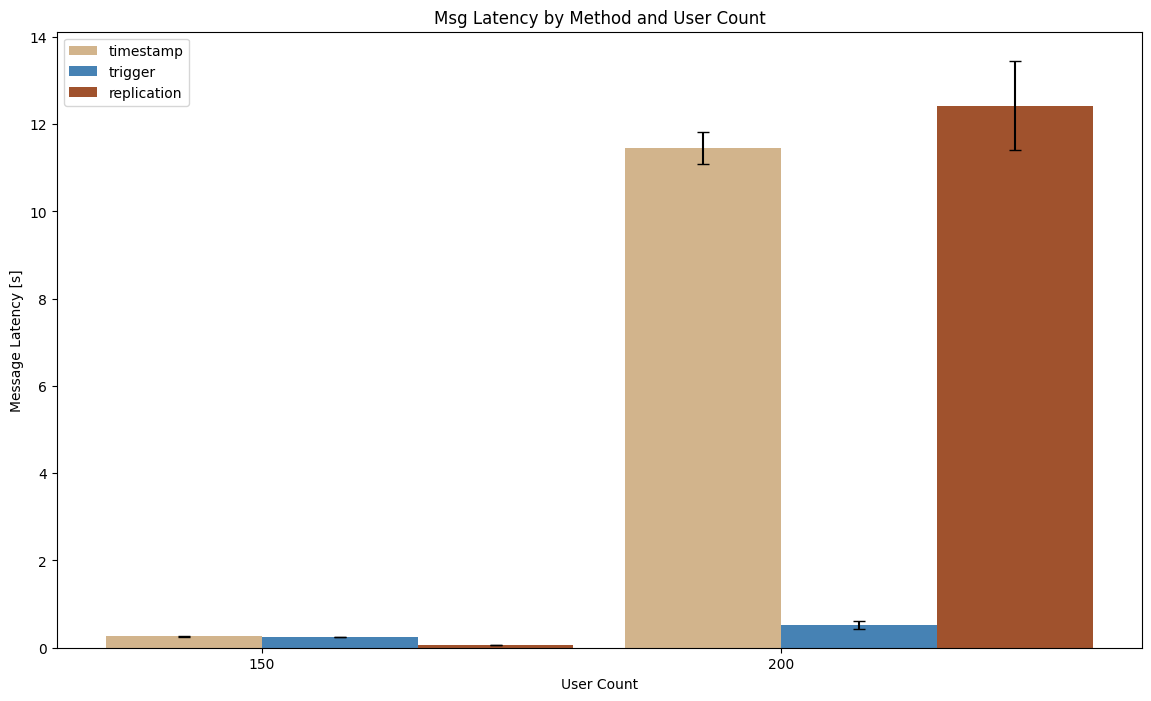

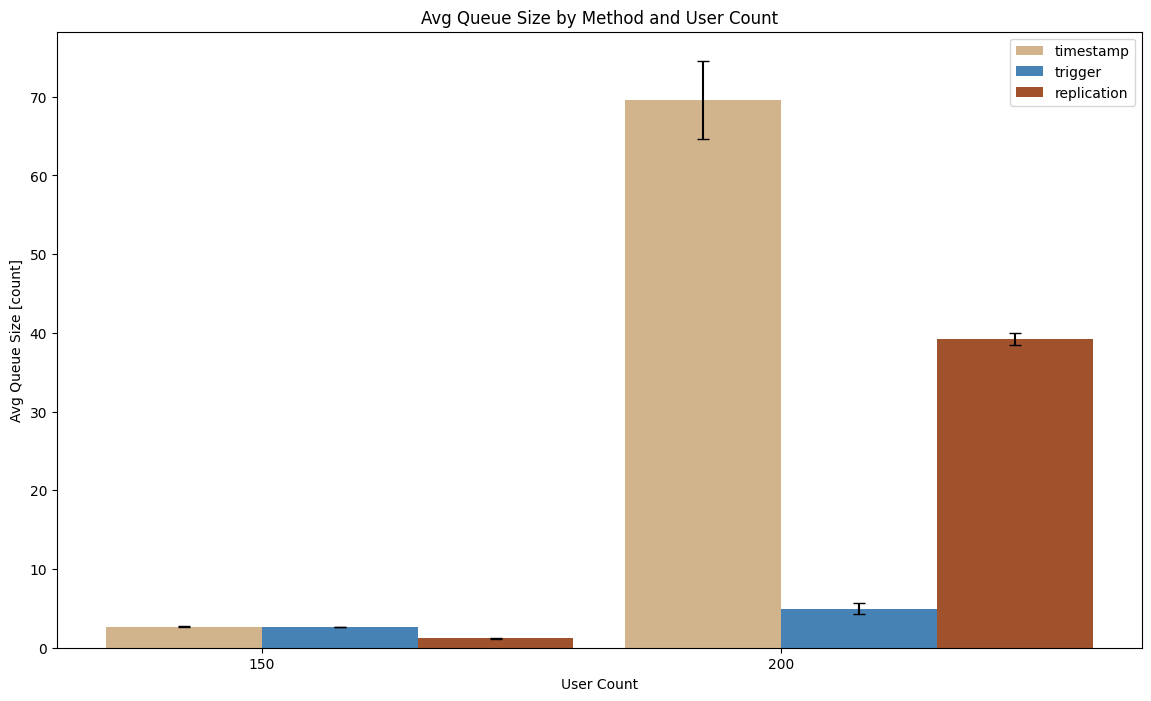

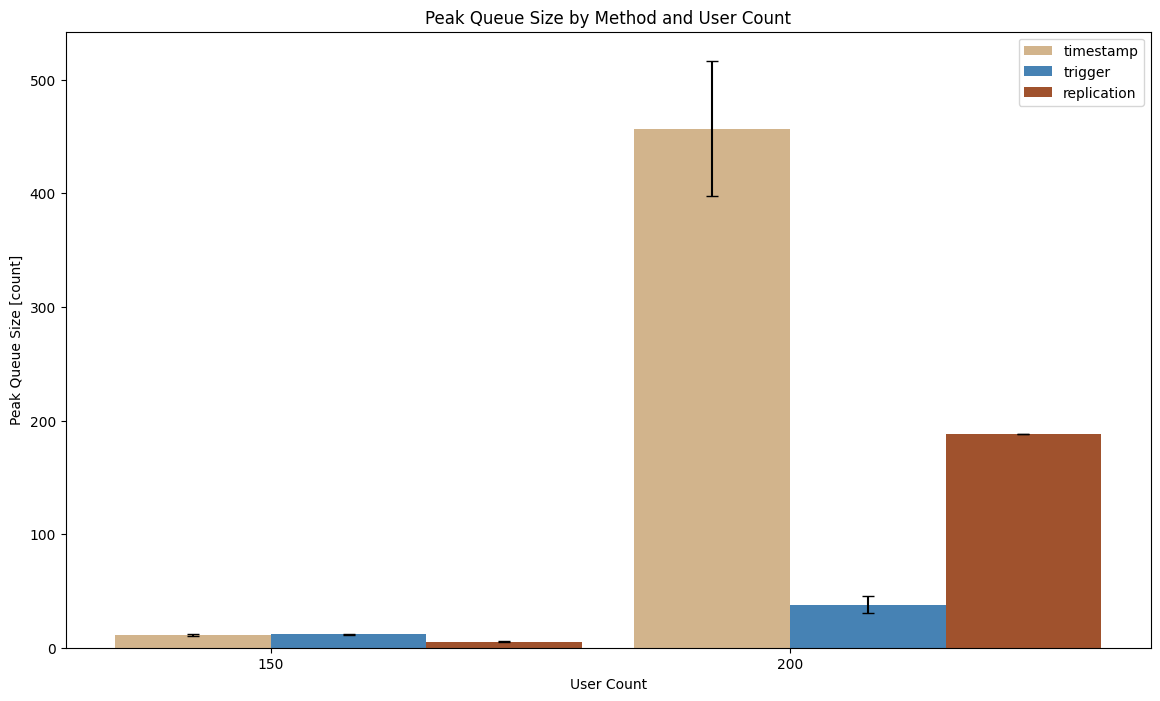

In [24]:
for metric in metrics:
    fig, ax = plt.subplots(figsize=(14, 8))
    width = 0.3

    x = np.arange(len(user_counts))

    for i, method in enumerate(methods):
        avg = [grouped.loc[(method, user_count)][(metric, 'mean')] for user_count in user_counts]
        stds = [grouped.loc[(method, user_count)][(metric, 'std')] for user_count in user_counts]

        ax.bar(x + i * width, avg, yerr=stds, width=width, label=method, capsize=4, color=color_map[method])

    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(user_counts)
    ax.set_xlabel('User Count')
    if metric == 'msg_latency':
        ax.set_ylabel('Message Latency [s]')
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))
    elif metric == 'avg_queue_size':
        ax.set_ylabel('Avg Queue Size [count]')
    elif metric == 'peak_queue_size':
        ax.set_ylabel('Peak Queue Size [count]')
    ax.set_title(f'{metric.replace("_", " ").title()} by Method and User Count')
    ax.legend()

    plt.show()